Processing -MNIST Fashion using TensorFlow
 Source code: https://gist.github.com/tomokishii/7ddde510edb1c4273438ba0663b26fc6

"""
Fashion-MNIST database of fashion articles.
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images

Labels
Each training and test example is assigned to one of the following labels:
0 T-shirt/top  1 Trouse  2 Pullover  3 Dress   4 Coat
5 Sandal       6 Shirt   7 Sneaker   8 Bag     9 Ankle boot 

TL;DR
Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)

In [1]:
# Importing 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt
import tensorflow as tf

# Import data
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\rivas\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# import data
mnist = input_data.read_data_sets('C:\\Users\\rivas\\OneDrive\\Documents\\JMR\\Education\\Springboard\\Projects\\Capstone1\\',one_hot=True)
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Extracting C:\Users\rivas\OneDrive\Documents\JMR\Education\Springboard\Projects\Capstone1\train-images-idx3-ubyte.gz
Extracting C:\Users\rivas\OneDrive\Documents\JMR\Education\Springboard\Projects\Capstone1\train-labels-idx1-ubyte.gz
Extracting C:\Users\rivas\OneDrive\Documents\JMR\Education\Springboard\Projects\Capstone1\t10k-images-idx3-ubyte.gz
Extracting C:\Users\rivas\OneDrive\Documents\JMR\Education\Springboard\Projects\Capstone1\t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10) (10000, 784) (10000, 10)


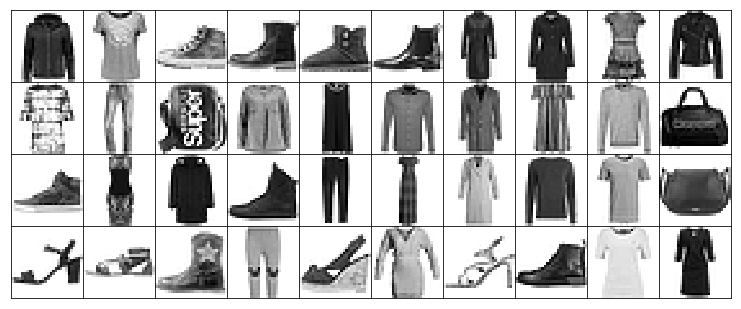

In [3]:
# Define function imshow - Sets up plot for a subset of the data
def imshow(image_set, nrows=4, ncols=10, figsize=(12.5, 5)):
    plot_num = nrows * ncols
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10*nrows/ncols))
    plt.tight_layout(False)
    fig.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
    ax = ax.ravel()
    for i in range(plot_num):
        ax[i].imshow(-image_set[i].reshape(28, 28), cmap="gray")
        ax[i].set_xticks([])
        ax[i].set_yticks([])

# plot sample of images
imshow(X_train)
plt.show()

In [4]:
# Variables
x = tf.placeholder("float", [None, 784])
y_ = tf.placeholder("float", [None, 10])

w_enc = tf.Variable(tf.random_normal([784, 625], mean=0.0, stddev=0.05))
w_dec = tf.Variable(tf.random_normal([625, 784], mean=0.0, stddev=0.05))
# w_dec = tf.transpose(w_enc) # if you use tied weights
b_enc = tf.Variable(tf.zeros([625]))
b_dec = tf.Variable(tf.zeros([784]))

In [5]:
# Create the model
def model(X, w_e, b_e, w_d, b_d):
    encoded = tf.sigmoid(tf.matmul(X, w_e) + b_e)
    decoded = tf.sigmoid(tf.matmul(encoded, w_d) + b_d)
    
    return encoded, decoded

In [6]:
encoded, decoded = model(x, w_enc, b_enc, w_dec, b_dec)


In [7]:
# Cost Function basic term
cross_entropy = -1. * x * tf.log(decoded) - (1. - x) * tf.log(1. - decoded)
loss = tf.reduce_mean(cross_entropy)
train_step = tf.train.AdagradOptimizer(0.1).minimize(loss)

In [9]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print('Training...')
    for i in range(10001):
        batch_xs, batch_ys = mnist.train.next_batch(128)
        train_step.run({x: batch_xs, y_: batch_ys})
        
        if i % 1000 == 0:
            train_loss = loss.eval({x: batch_xs, y_: batch_ys})
            print('  step, loss = %6d: %6.3f' % (i, train_loss))
            
    # generate decoded image with test data
    test_fd = {x: mnist.test.images, y_: mnist.test.labels}
    decoded_imgs = decoded.eval(test_fd)
    print('loss (test) = ', loss.eval(test_fd))

Training...
  step, loss =      0:  0.727
  step, loss =   1000:  0.443
  step, loss =   2000:  0.409
  step, loss =   3000:  0.388
  step, loss =   4000:  0.380
  step, loss =   5000:  0.350
  step, loss =   6000:  0.360
  step, loss =   7000:  0.346
  step, loss =   8000:  0.348
  step, loss =   9000:  0.337
  step, loss =  10000:  0.345
loss (test) =  0.33904663


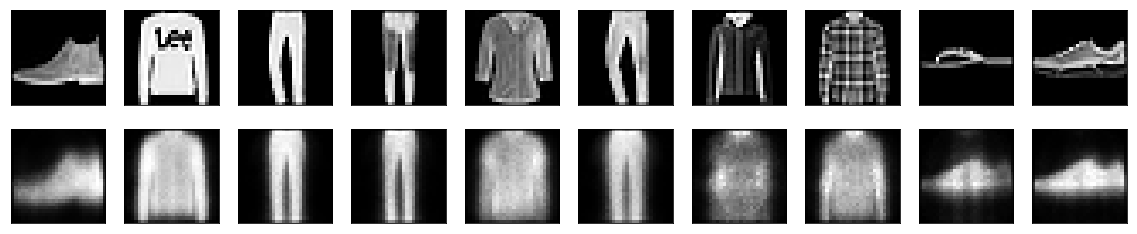

In [10]:
# 10 images we will display
# Both original and reconstruction
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()